# Seaborn
---
 seaborn 是matpyplot的封装，有很多好用的模板

In [2]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

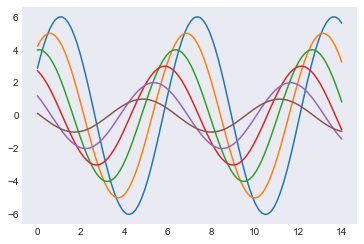

In [4]:
# 设置风格
sns.set_style('dark')

sinplot()

# 去掉顶部和右边的轴
sns.despine()

## 5 种主题风格
- darkgrid
- whitegrid
- dark
- white
- ticks

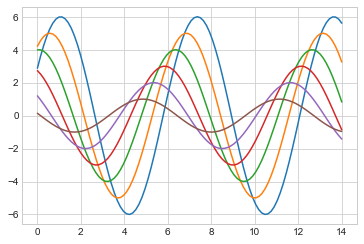

In [6]:
sns.set_style('whitegrid')
sinplot()

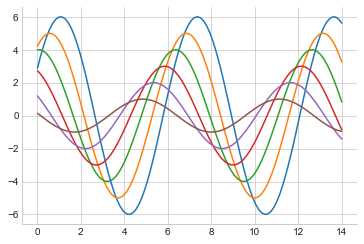

In [7]:
# 移除轴脊柱
sinplot()
sns.despine()

## 风格细节设置
---

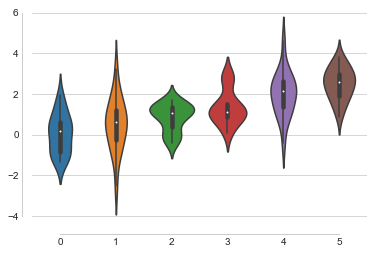

In [8]:
f, ax = plt.subplots()
data = np.random.normal(size=(20,6)) + np.arange(6)/2
sns.violinplot(data=data)
sns.despine(offset=10,trim=True)

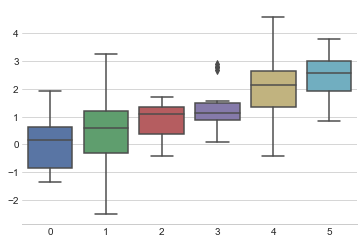

In [9]:
# 绘制箱型图并移除左轴
sns.set_style('whitegrid')
sns.boxplot(data=data,palette='deep')
sns.despine(left=True)

### 设置临时绘图风格
---

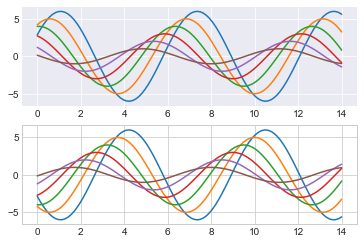

In [10]:
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

## 覆盖seaborn的风格元素
---

In [11]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.linewidth': 1.0,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.major.size': 0.0,
 'ytick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.minor.size': 0.0,
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif']}

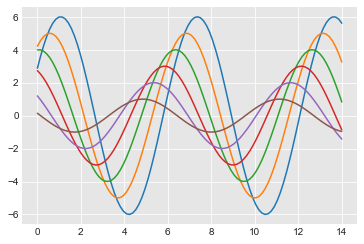

In [12]:
sns.set_style('darkgrid',{'axes.facecolor':'.9'})
sinplot()

## 绘图元素比例
- paper
- notebook
- talk
- poster
---

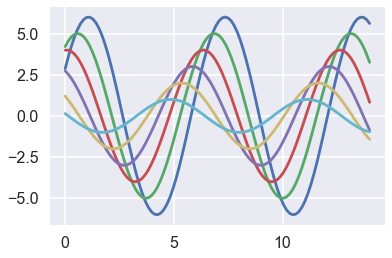

In [17]:
sns.set()
sinplot()

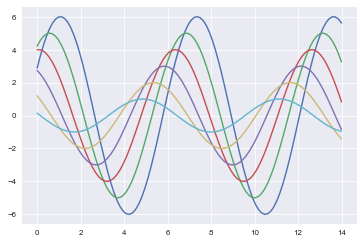

In [18]:
sns.set_context('paper')
sinplot()

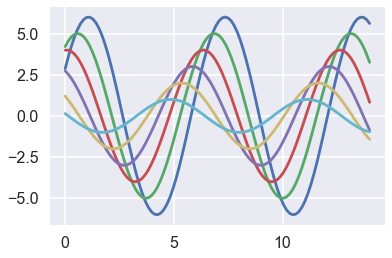

In [21]:
sns.set_context('poster')
sinplot()

## 绘制简单的变量分布图


In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import  stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
np.random.seed(sum(map(ord,'distributions')))

/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


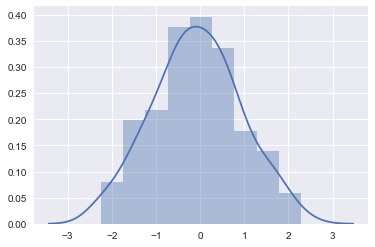

In [27]:
# 柱状图📊
x = np.random.normal(size=100)
sns.distplot(x)

/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


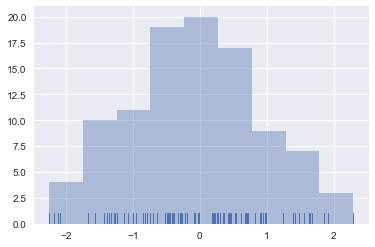

In [28]:
# 直方图,并对密度进行编码
sns.distplot(x,kde=False,rug=True)

/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


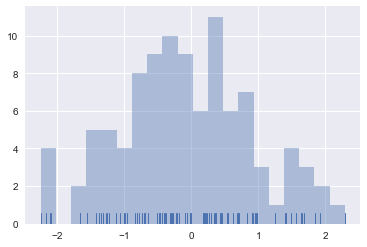

In [29]:
sns.distplot(x, bins=20, kde=False,rug=True)

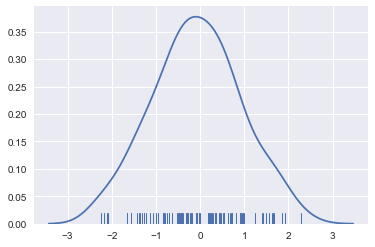

In [30]:
sns.distplot(x, hist=False,rug=True)

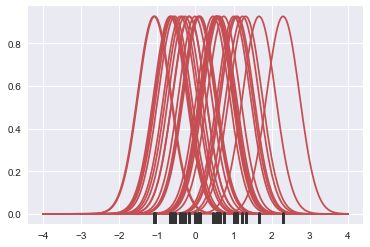

In [31]:
# 
x = np.random.normal(0.1,size=30)

bandwidth = 1.06 * x.std() * x.size **(-1/5)
support = np.linspace(-4,4,200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i,bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support,kernel,color='r')
sns.rugplot(x,color='.2',linewidth=3)

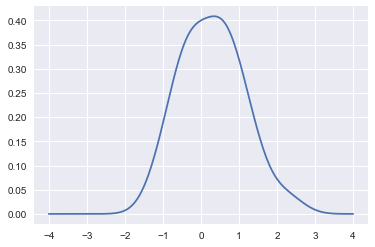

In [33]:
# 对以上的曲线进行相加，并计算出每个点的密度值，生成归一化的曲线
density = np.sum(kernels,axis=0)
density /= integrate.trapz(density,support)
plt.plot(support,density)

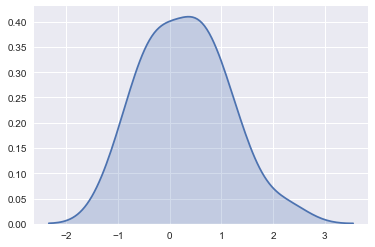

In [34]:
sns.kdeplot(x,shade=True)

/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


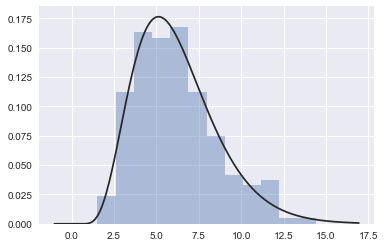

In [37]:
# 拟合参数分布
x = np.random.gamma(6,size=200)
sns.distplot(x,kde=False,fit=stats.gamma)

In [38]:
# 绘制双变量分布

mean , cov = [0,1],[(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data,columns=['x','y'])


/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


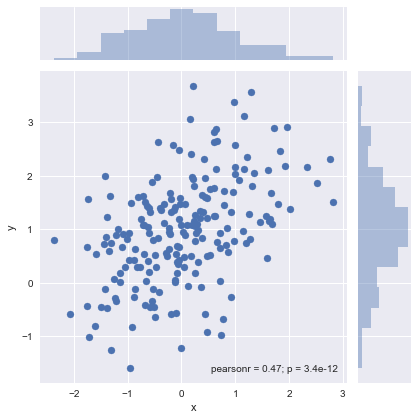

In [39]:
# Scatterplot
sns.jointplot(x='x',y='y',data=df)

### 六角箱型图 hexbin


/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


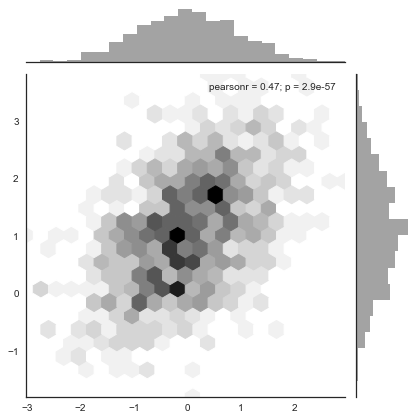

In [40]:
x, y = np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x,y=y,kind='hex',color='k')

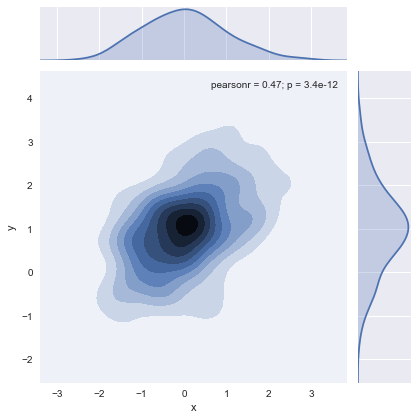

In [42]:
# 使用核密度估计过程来可视化双变量分布
sns.jointplot(x='x',y='y',data=df,kind='kde')

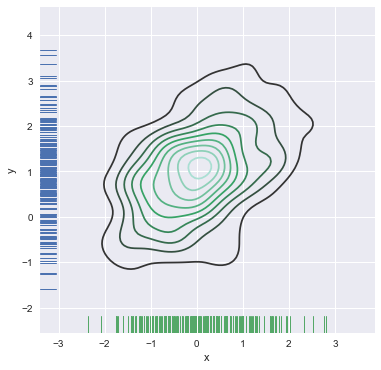

In [44]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

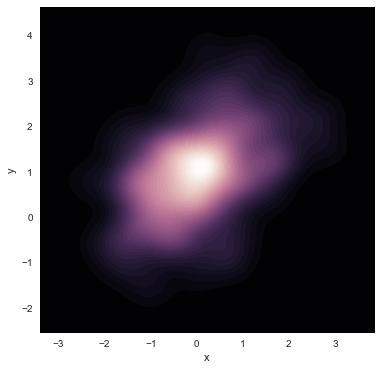

In [46]:
# 增加n 轮廓级数似的分布看起来更加连续
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)
sns.kdeplot(df.x,df.y,cmap=cmap, n_levels=60,shade=True)

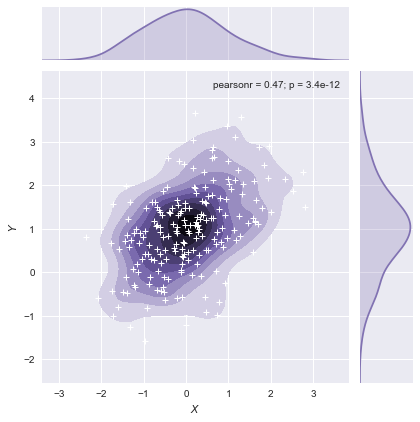

In [47]:
g = sns.jointplot(x='x',y='y',data=df, kind='kde', color='m')
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')

### 可视化数据集成对关系


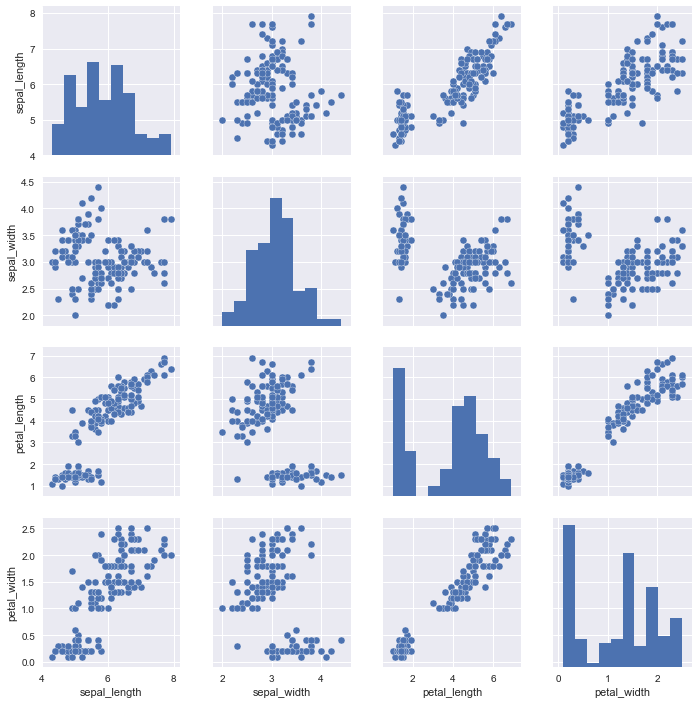

In [48]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/marlonleng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 

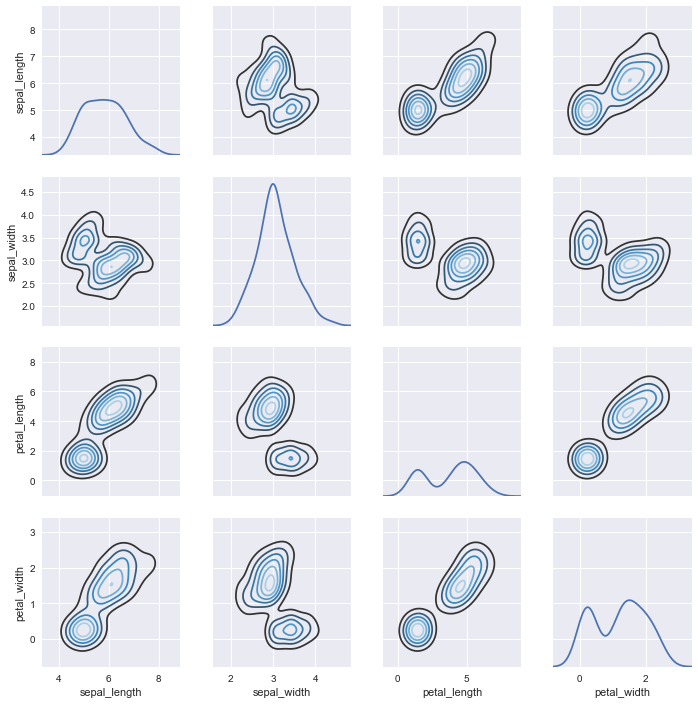

In [50]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap='Blues_d',n_levels=6)